In [4]:
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

import torch
import torch.optim as optim
from model import quad
from utils import *
from sphere import *

# hyper params initalization
_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Hyper-param Config

In [8]:
_lr_rate = 0.0001
batch_size = 50
# total_samples = 50e6
total_samples = 1e4
r = 1.3
dim = 500
err_freq = 100
pgd_itr = 1
seed = 0

# Training begins

In [6]:
seed_everything(seed)
_model = quad().to(_device)
_opt = optim.Adam(_model.parameters(), lr = _lr_rate)
        
log = train_adv(pgd_itr, dim, r, total_samples, batch_size, err_freq, _model, _opt, _device)

100%|██████████| 200/200 [00:04<00:00, 49.16it/s, acc=52.00%, loss=0.752]


# Plot results

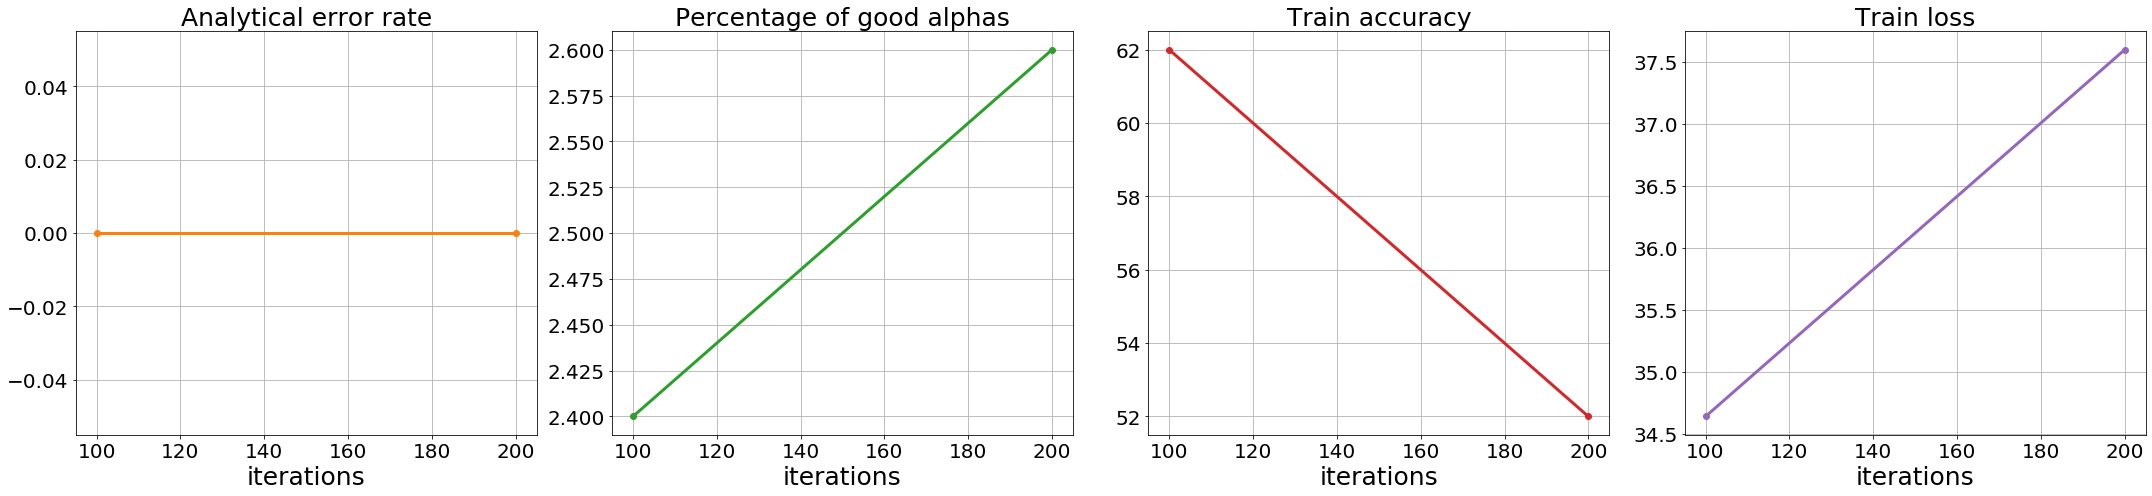

In [7]:
fig = plot_err_stats(log,False)
fig.tight_layout()